In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Создание искусственного датасета.

Создание будет на основе данных Tinkoff журнала ["Портрет российского инвестора — 2020"](https://vc.ru/tinkoff_invest/216367-tinkoff-investicii-sostavili-portret-rossiyskogo-investora-2020).

Создадим 25000 искусственных пользователей


Создадим пустой датафрейм, куда будем добавлять данные

In [87]:
df = pd.DataFrame()


length_of_data = 25000

Напишем функцию, которая будет принимать значения признака, его название, его вероятность, датафрейм и будет добавлять в датафрейм новую колонку с значениями данного признака

In [88]:
def concat_dataframes(feature_value, feature_percent,
                      feature_name, dataframe):

  """

  feature_value -> (List) - Данные признака, который хотим добавить
  feature_percent -> (List) - Вероятности этого признака
  feature_name -> (String) - Название столбца в датафрейме
  dataframe -> (DataFrame) - Датафрейм для добавления данных


  """


  data = dict()

  for i in range(length_of_data):
      data[i] = np.random.choice(feature_value, p=feature_percent)


  data = pd.DataFrame({feature_name : data})

  dataframe = pd.concat([dataframe, data], axis = 1)



  return dataframe

**Пол инвестора**

In [89]:
sex_value = ["Мужчина", "Женщина"]

sex_percent = [0.69, 0.31]

df = concat_dataframes(sex_value, sex_percent, "Sex", df)


**Возраст**

In [90]:
age_value = ['18-28','28-38', '38-48', '48+']

age_percent = [0.27, 0.43, 0.21, 0.09]



df = concat_dataframes(age_value, age_percent, "Age", df)

**Образование**

In [91]:
education_value = ['Ученая степень', 'Среднее образование',
                   'Несколько высших', 'Высшее образование']

education_percent = [0.01, 0.23, 0.04, 0.72]

df = concat_dataframes(education_value, education_percent, "Education", df)

**Род занятий**

In [92]:
activity_value = ['Пенсионер', 'Безработный', 'Специалист',
                  'Владелец бизнеса', 'Руководитель']

activity_percent = [0.01, 0.13, 0.54, 0.15, 0.17]

df = concat_dataframes(activity_value, activity_percent, "Activity", df)

**Состоят ли в браке или нет**

In [93]:
marriage_value = ['В браке', 'Не состоит в браке']

marriage_percent = [0.6, 0.4]

df = concat_dataframes(marriage_value, marriage_percent, "Marriage_status", df)

Далее в статье указаны наличие детей, которые составляет 50/50, следовательно, данный признак не будет влиять на результат.


**Рискованность инвестора**

In [94]:
risk_value = ['Не склонны к риску', 'Средняя склонность к риску',
              'Склонны к риску']

risk_percent = [0.14, 0.5, 0.36]

df = concat_dataframes(risk_value, risk_percent, "Risk_status", df)


**Города**
В данной статье приведены ""Доделать""

In [95]:
city_value = ['Москва', 'Санкт-Петербург', 'Краснодар',
              'Екатеринбург', 'Казань', 'Самара', 'Новосибирск',
              'Ростов-на-Дону', 'Нижний Новгород', 'Уфа']

citizens = np.array([13010, 5602, 1099, 1544, 1309, 1173, 1634,
            1142, 1226, 1145])

citizens_sum = citizens.sum()
city_percent = np.array([round(citizen/citizens_sum, 3) for
                         citizen in citizens])

assert city_percent.sum() == 1.


df = concat_dataframes(city_value, city_percent, "Location", df)

**Ежемесячный заработок в тыс. руб**

In [96]:
salary_value = ['<50', '50-100', '100-500', '>500']

salary_percent = [0.3, 0.35, 0.3, 0.05]

df = concat_dataframes(salary_value, salary_percent, "Salary", df)


**Количество сделок в месяц**

In [97]:
deal_value = ['<3', '4-10', '11-50', '>50']

deal_percent = [0.72, 0.15, 0.09, 0.04]

df = concat_dataframes(deal_value, deal_percent, "Deals", df)


**Количество денег на брокерских счетах**  [ЦБ впервые посчитал деньги россиян на брокерских счетах](https://vc.ru/money/197188-cb-vpervye-poschital-dengi-rossiyan-na-brokerskih-schetah-6-7-trln-rubley-k-oktyabryu-2020-goda) в 100 тыс. руб

In [98]:
depo_value = ['<0.1', '0.1-1', '1-10', '10-100', '>100']

depo_percent = [0.751, 0.076, 0.116, 0.047, 0.01]

df = concat_dataframes(depo_value, depo_percent, "Depo_status", df)


In [99]:
df.head()

,Sex,Age,Education,Activity,Marriage_status,Risk_status,Location,Salary,Deals,Depo_status
0,Мужчина,38-48,Среднее образование,Специалист,В браке,Средняя склонность к риску,Казань,50-100,<3,<0.1
1,Женщина,18-28,Среднее образование,Руководитель,В браке,Склонны к риску,Москва,50-100,<3,<0.1
2,Мужчина,28-38,Высшее образование,Специалист,В браке,Средняя склонность к риску,Самара,100-500,<3,<0.1
3,Мужчина,48+,Высшее образование,Специалист,Не состоит в браке,Средняя склонность к риску,Санкт-Петербург,50-100,<3,<0.1
4,Мужчина,18-28,Несколько высших,Специалист,В браке,Средняя склонность к риску,Санкт-Петербург,100-500,4-10,1-10


Визуализируем данные с помощью круговых диаграмм

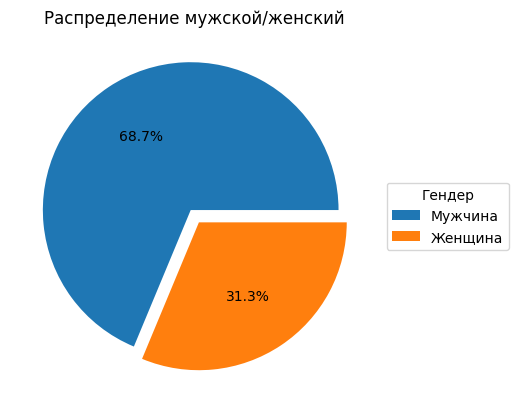

In [100]:
vals = df['Sex'].value_counts()
labels = np.array(vals.index)

fig, ax = plt.subplots()

explode = (0.05, 0.05)

wedges, texts, autotexts = ax.pie(vals,
                                  explode = explode,
                                  autopct='%1.1f%%')

ax.legend(wedges, labels,
          title ="Гендер",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Распределение мужской/женский')

plt.show()

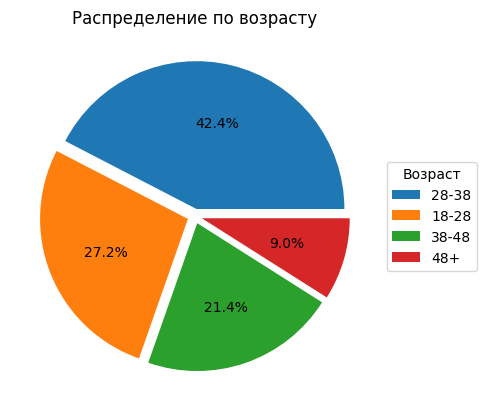

In [101]:
vals = df['Age'].value_counts()
labels = np.array(vals.index)

fig, ax = plt.subplots()

explode = (0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax.pie(vals,
                                  explode = explode,
                                  autopct='%1.1f%%')

ax.legend(wedges, labels,
          title ="Возраст",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Распределение по возрасту')

plt.show()

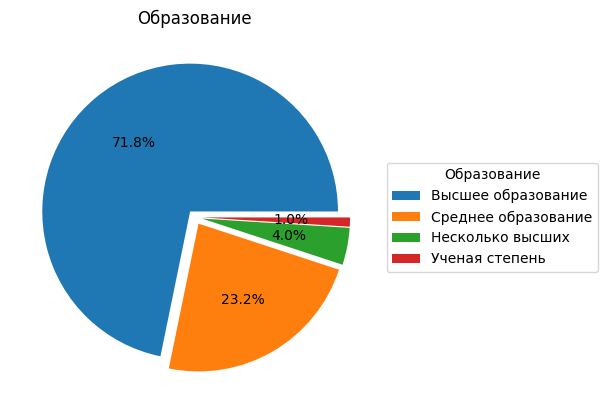

In [102]:
vals = df['Education'].value_counts()
labels = np.array(vals.index)

fig, ax = plt.subplots()

explode = (0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax.pie(vals,
                                  explode = explode,
                                  autopct='%1.1f%%')

ax.legend(wedges, labels,
          title ="Образование",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Образование')
plt.show()

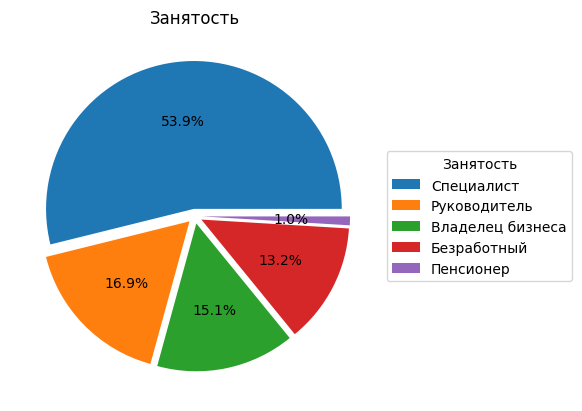

In [103]:
vals = df['Activity'].value_counts()
labels = np.array(vals.index)

fig, ax = plt.subplots()

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax.pie(vals,
                                  explode = explode,
                                  autopct='%1.1f%%')

ax.legend(wedges, labels,
          title ="Занятость",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Занятость')
plt.show()

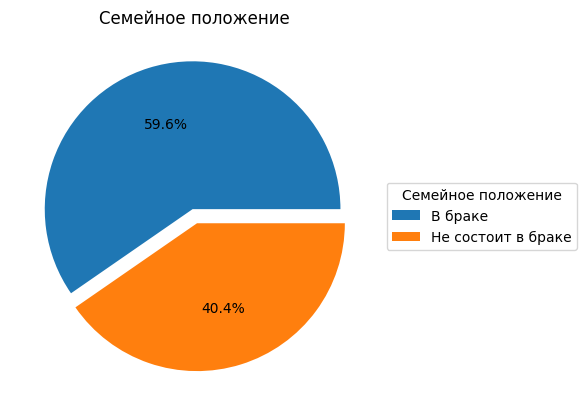

In [104]:
vals = df['Marriage_status'].value_counts()
labels = np.array(vals.index)
fig, ax = plt.subplots()
explode = (0.05, 0.05)

wedges, texts, autotexts = ax.pie(vals,
                                  explode = explode,
                                  autopct='%1.1f%%')

ax.legend(wedges, labels,
          title ="Семейное положение",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Семейное положение')
plt.show()

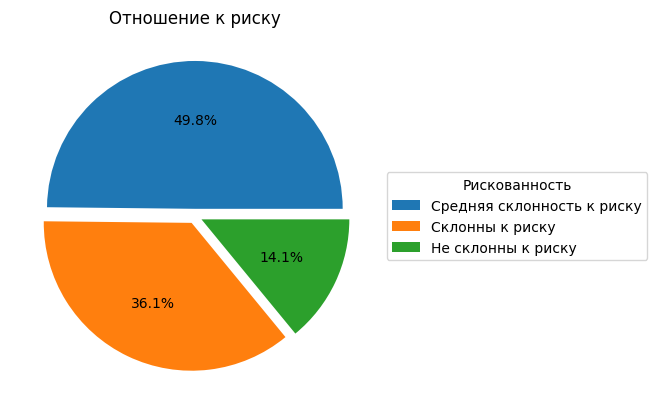

In [105]:
vals = df['Risk_status'].value_counts()
labels = np.array(vals.index)

fig, ax = plt.subplots()

explode = (0.05, 0.05, 0.05)

wedges, texts, autotexts = ax.pie(vals,
                                  explode = explode,
                                  autopct='%1.1f%%')

ax.legend(wedges, labels,
          title ="Рискованность",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Отношение к риску')
plt.show()

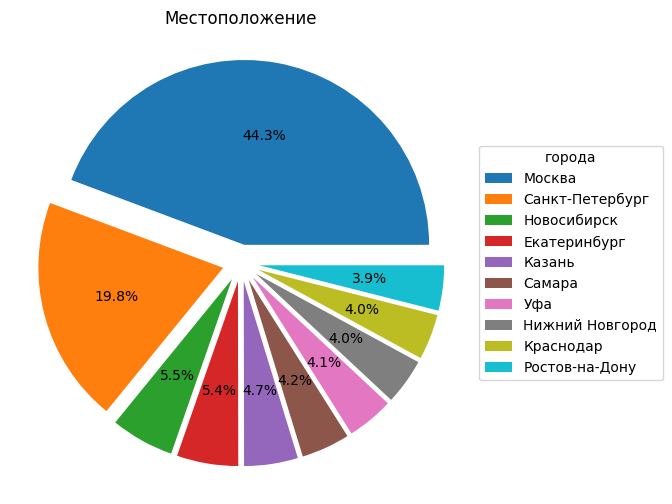

In [106]:
vals = df['Location'].value_counts()
labels = np.array(vals.index)

fig, ax = plt.subplots(figsize =(6, 6))

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

wedges, texts, autotexts = ax.pie(vals,
                                  explode = explode,
                                  autopct='%1.1f%%')

ax.legend(wedges, labels,
          title ="города",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Местоположение')
plt.show()

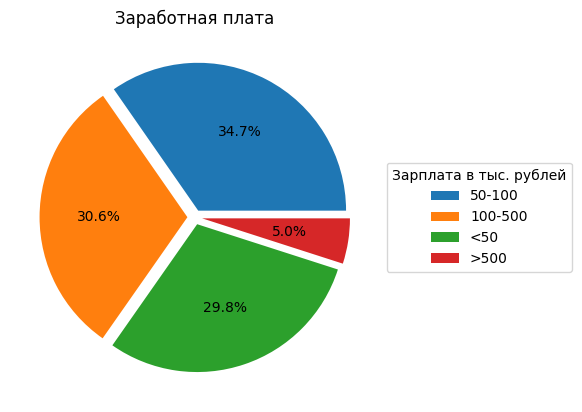

In [107]:
vals = df['Salary'].value_counts()
labels = np.array(vals.index)

fig, ax = plt.subplots()

explode = (0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax.pie(vals,
                                  explode = explode,
                                  autopct='%1.1f%%')

ax.legend(wedges, labels,
          title ="Зарплата в тыс. рублей",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Заработная плата')
plt.show()

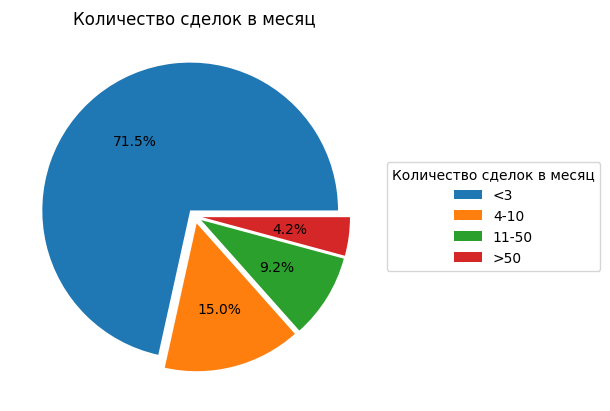

In [108]:
vals = df['Deals'].value_counts()
labels = np.array(vals.index)

fig, ax = plt.subplots()

explode = (0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax.pie(vals,
                                  explode = explode,
                                  autopct='%1.1f%%')

ax.legend(wedges, labels,
          title ="Количество сделок в месяц",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Количество сделок в месяц')
plt.show()

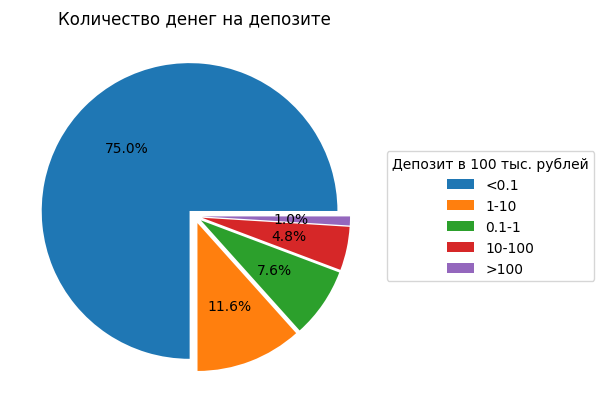

In [109]:
vals = df['Depo_status'].value_counts()
labels = np.array(vals.index)

fig, ax = plt.subplots()

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax.pie(vals,
                                  explode = explode,
                                  autopct='%1.1f%%')

ax.legend(wedges, labels,
          title ="Депозит в 100 тыс. рублей",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Количество денег на депозите')
plt.show()

Удобнее будет заменить данный в датасете с помощью маппинга

In [110]:
sex_dict = {'Мужчина': 1,
            'Женщина': 0}

age_dict = {'18-28': 23,
            '28-38': 43,
            '38-48': 53,
            '48+': 60}

education_dict = {'Высшее образование': 0,
                  'Среднее образование': 1,
                  'Несколько высших': 2,
                  'Ученая степень': 3}

activity_dict = {'Владелец бизнеса': 4, 'Руководитель': 3, 'Безработный': 2,
                 'Специалист': 1, 'Пенсионер': 0}

status_dict = {'В браке': 1,
               'Не состоит в браке': 0}

risk_profile_dict = {'Склонны к риску': 0,
                     'Средняя склонность к риску': 1,
                     'Склонны к риску': 2}

city_dict = {'Moscow': 0,
             'Sain-Petersburg': 1,
             'Krasnodar': 2,
             'Moscow_region': 3,
             'Tatarstan': 4,
             'Rostov': 5,
             'Samara': 6,
             'Ekaterinburg': 7,
             'Volgograd': 8,
             'Novosibirsk': 9}

salary_dict = {'<50': 0,
                  '50-100': 1,
                  '100-500': 2,
                  '>500': 3}

deal_dict = {'<3': 0,
                  '4-10': 1,
                  '11-50': 2,
                  '>50': 3}

depo_dict = {'<0.1': 0,
             '0.1-1': 1,
             '1-10': 2,
             '10-100': 3,
             '>100': 4}



In [111]:
df['Sex'] = df.Sex.map(sex_dict)
df['Age'] = df.Age.map(age_dict)
df['Education'] = df.Education.map(education_dict)
df['Activity'] = df.Activity.map(activity_dict)
df['Marriage_status'] = df.Marriage_status.map(status_dict)
df['Risk_status'] = df.Risk_status.map(risk_profile_dict)
df['Location'] = df.Location.map(city_dict)
df['Salary'] = df.Salary.map(salary_dict)
df['Deals'] = df.Deals.map(deal_dict)
df['Depo_status'] = df.Depo_status.map(depo_dict)


# В будущем можно добавить описание датасета

In [112]:
df.head()

,Sex,Age,Education,Activity,Marriage_status,Risk_status,Location,Salary,Deals,Depo_status
0,1,53,1,1,1,1.0,NaN,1,0,0
1,0,23,1,3,1,2.0,NaN,1,0,0
2,1,43,0,1,1,1.0,NaN,2,0,0
3,1,60,0,1,0,1.0,NaN,1,0,0
4,1,23,2,1,1,1.0,NaN,2,1,2


In [114]:
df.to_csv("DataSet_users.csv", encoding='utf-8', index=False)